# Lecture 4: Supervised Models, [Multinomial Naïve Bayes (MNB)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) Classifier

* How to train a Multinomial Naïve Bayesian classifier with `sklearn`.

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Data

MNB classifiers are often used to predict labels for textual data. This also allows us to practice vectorisation.

We use the well-known [newsgroups data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html), which "comprises around 18000 newsgroups posts on 20 topics" ([src](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset)). Our goal is to create an MNB model that can predict posts' topics based on their text.

In [2]:
from sklearn.datasets import fetch_20newsgroups

X, y = fetch_20newsgroups(return_X_y=True)

`X` now contains a single blob of text for each post:

In [3]:
X[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

We can't use text directly in models. Instead, we need to **vectorise** it. Vectorisation is the process of taking non-numerical data (usually text or pictures) and transforming it into a numerical vector.

A very common and simple vectoriser is to simply count words:

<img src="vectorisation.png" alt="Vectorisation" style="width: 600px; display: inline; margin-top: 0"/><br>
Picture from *Applied Text Analysis with Python* by *Benjamin Bengfort, Rebecca Bilbro, Tony Ojeda* ([src](https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html))</br>

Each text (or *document*) becomes a vector of word counts. The length of the vector is determined by the number of words in all documents (the *corpus*). Every word has its own entry in the vector and vectors for each observation are equally long.

Count vectorisation is implemented in `sklearn`'s [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

It's easy to use:
1. We import `CountVectorizer` from `sklearn.feature_extraction.text`.
2. We instantiate the vectoriser, using a small integer format (`np.int16`) to conserve memory.
3. We call `fit_transform(X)` to transform `X` into a vector.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectoriser = CountVectorizer(dtype=np.int16)
X_vect = vectoriser.fit_transform(X).tocsr()

Since each word is a column (and each row is a document), `X_vect` is quite big:

In [6]:
X_vect.shape

(11314, 130107)

At the same time, there are many zeros in `X_vect`. Matrices with many zeros are called [**sparse matrices**](https://en.wikipedia.org/wiki/Sparse_matrix), and there are special tools that can process such sparse matrices faster than normal matrices. In Python, that's [Scipy's sparse matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) (`csr` for *Compressed Sparse Row*):

In [7]:
type(X_vect)

scipy.sparse.csr.csr_matrix

That is the reason why we called `tocsr()` after the vectorisation. If we had not done that, the full `ndarray` may well have filled up your computer's memory.

We can "display" a CSR's content by converting it to an `ndarray`:

In [8]:
X_vect[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int16)

`CountVectorizer` and other variable transformers in `sklearn` expose two APIs: `fit()` and `transform()`. Like with a ML model, `fit()` "*trains*" the transformer on the data (in this case, how many and which words there are) and `transform()` does the actual transformation into a numerical matrix. If you have test and training data, you need to call `fit()` on both the training and test data together. In this case, we only have one data, so we call `fit_transform()`, which performs both steps in one.

Now you've seen the basic process of vectorisation. We can further improve vectorisation by pre-processing the text, for example by removing stop words (e.g., remove all "and"s) and performing stemming. However, this is beyond this course. [NLTK](https://www.nltk.org/) is a good place to start if you're interested in natural language processing.

Posts' topics (the outcome variable) are already encoded as integers between 0 and 19, so we don't need to do anything:

In [4]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## Model Training

We follow the `sklearn` training process as seen on the slides.

### 1. Choose a Model

In [9]:
from sklearn.naive_bayes import MultinomialNB

### 2. Choose Hyperparameters

None for now.

In [10]:
model = MultinomialNB()
model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 3. Arrange Data in Feature Matrix and Target Vector

* `y` needs to be an `n_samples` long vector
* `X` needs to be a `[n_samples, n_features]` matrix

In [11]:
X_vect.shape

(11314, 130107)

In [12]:
y.shape

(11314,)

### 4. Fit the Model to the Data

In [13]:
model.fit(X_vect, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

As with GNBs, we're not usually interested in an MNB's parameters.

The main performance metric for an MNB model is its accuracy: \\(\frac{correct\space decisions}{all\space  decisions}\\)

The model can compute its accuracy automatically for us with the [`score()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.score) method:

In [14]:
model.score(X_vect, y)

0.9245182959165635

This means that the model predicted 93% of all cases in the data correctly.

We can use [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict) to count how many posts have been mislabelled:

In [15]:
y_pred = model.predict(X_vect)
(y != y_pred).sum()

854

That's unfortunately a few too many too look at manually. However, the evaluation of categorical regressands lends itself to a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[469,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   7,   0,   2,   0,   2],
       [  0, 565,   0,   6,   1,   3,   2,   0,   0,   0,   0,   1,   0,
          1,   3,   0,   0,   0,   2,   0],
       [  0,  82,  85, 203,  18, 137,   2,   3,   0,   0,   1,  26,  16,
          4,   3,   2,   2,   1,   6,   0],
       [  0,   4,   0, 569,   3,   2,   5,   1,   0,   0,   1,   2,   0,
          0,   1,   0,   0,   1,   1,   0],
       [  1,   1,   0,   1, 566,   1,   1,   0,   1,   0,   0,   2,   0,
          0,   0,   0,   0,   1,   3,   0],
       [  0,   5,   0,   0,   1, 584,   0,   1,   0,   0,   0,   1,   0,
          0,   1,   0,   0,   0,   0,   0],
       [  1,   1,   0,  21,   1,   0, 498,  13,   1,   0,   4,  11,   8,
          4,   3,   1,   6,   4,   8,   0],
       [  1,   0,   0,   0,   0,   0,   1, 585,   1,   0,   0,   1,   1,
          0,   1,   0,   1,   0,   2,   0],
       [  0,   0,   0,   0,   1,   0,   2,   3, 585,   0,   0,  

We can use [Seaborn's](https://seaborn.pydata.org/) [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to render the confusion matrix in a more human-readable format:

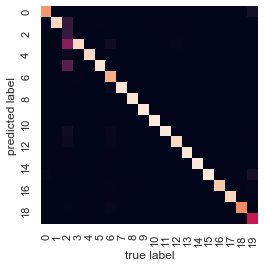

In [17]:
sns.heatmap(cm.T, square=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Very strong for all but `y=2`.

© 2023 Philipp Cornelius